In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

In [2]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Baek GeonJae\Desktop\sk-learn project\USA_Housing.csv', sep=',',header=None)   # do not download the data files as they may change
df
df_adjusted = df.drop(columns=[6], axis=1)                # Remove the address column
df_adjusted.columns = df_adjusted.iloc[0]
df_adjusted = df_adjusted[1:]

df_adjusted

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
1,79545.45857,5.682861322,7.009188143,4.09,23086.8005,1059033.558
2,79248.64245,6.002899808,6.730821019,3.09,40173.07217,1505890.915
3,61287.06718,5.86588984,8.51272743,5.13,36882.1594,1058987.988
4,63345.24005,7.188236095,5.586728665,3.26,34310.24283,1260616.807
5,59982.19723,5.040554523,7.839387785,4.23,26354.10947,630943.4893
...,...,...,...,...,...,...
4996,60567.94414,7.830362444,6.137356228,3.46,22837.36103,1060193.786
4997,78491.27543,6.999134987,6.576762661,4.02,25616.11549,1482617.729
4998,63390.68689,7.250590615,4.80508098,2.13,33266.14549,1030729.583
4999,68001.33124,5.534388416,7.130143864,5.44,42625.62016,1198656.872


### 1. Split Data into training and test data sets

In [3]:
## Split the data, df_adjusted into training (90%) and testing (10%) using sklearn
from sklearn.model_selection import train_test_split 
df_training, df_testing = train_test_split(df_adjusted, test_size=0.1, random_state=50)

df_training
df_testing                           

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
3432,50570.86481,5.828142871,4.85142302,4.36,40580.09229,612938.7145
2043,65314.72011,6.918945345,6.245655683,2.42,36565.02983,1347083.07
80,64419.25264,6.954422126,8.516160048,6.16,39318.17075,1492011.496
4664,60390.50286,5.195406378,8.368912846,6.27,37921.72059,1223915.253
3641,73068.5181,7.271422215,5.685407675,3.14,42929.87616,1368692.297
...,...,...,...,...,...,...
4927,59979.98691,5.367789514,7.287303779,6.27,33072.60529,980049.3901
3700,76545.78583,5.128212246,7.247375951,5.12,50480.96295,1578141.053
3302,77013.1806,7.398134291,7.517188956,5.23,43432.87979,1890056.385
3325,81988.54904,6.901876796,7.58807521,6.38,29277.34641,1689690.754


### 1.1 Normalize Data

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
minmax_scaler = MinMaxScaler()

x = df_training.drop('Price', axis=1)
y = df_training['Price']

X_scaled_values = minmax_scaler.fit_transform(x)
Y_scaled_values = minmax_scaler.fit_transform(y.values.reshape(-1,1))


x = X_scaled_values
y = Y_scaled_values

### 1.2 Plot the features of data to see if a linear regression line is a good fit
It is helpful to understand if the data lends to a good linear regression model. Some features may have more predictive power than others. In this activity, we will plot the points to see if a linear regression line fit to data is reasonable. Plot housing prices vs each of the other features.

#### Plot House Age vs Hous Price

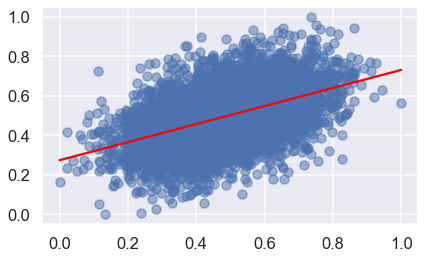

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area House Age" and y = price

x = X_scaled_values[:, 1]
y = Y_scaled_values

coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients.flatten())

x_regression = np.linspace(min(x), max(x), 100)
y_regression = poly(x_regression)

plt.scatter(x, y, alpha=0.5)
plt.plot(x_regression, y_regression, color='red')

plt.show()

#### Plot number of rooms vs House Price

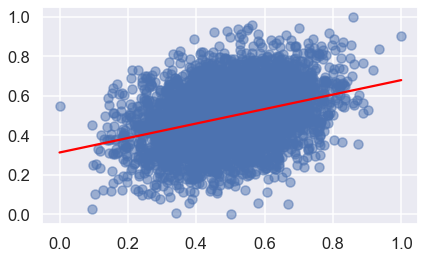

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area Number of Rooms" and y = price

x = X_scaled_values[:, 2]
y = Y_scaled_values

coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients.flatten())

x_regression = np.linspace(min(x), max(x), 100)
y_regression = poly(x_regression)

plt.scatter(x, y, alpha=0.5)
plt.plot(x_regression, y_regression, color='red')

plt.show()


#### Plot income vs House Price

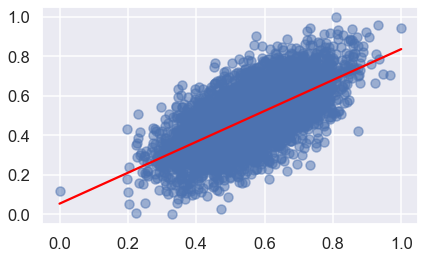

In [14]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Area income" and y = price

x = X_scaled_values[:, 0]
y = Y_scaled_values

coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients.flatten())

x_regression = np.linspace(min(x), max(x), 100)
y_regression = poly(x_regression)

plt.scatter(x, y, alpha=0.5)
plt.plot(x_regression, y_regression, color='red')

plt.show()

#### Plot Bedrooms vs Price

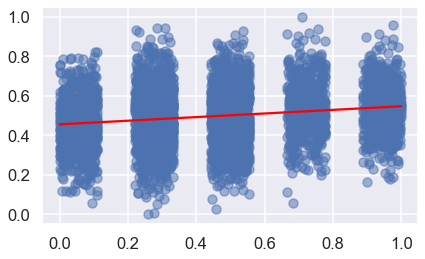

In [17]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "Avg. Bedrooms" and y = price


x = X_scaled_values[:, 3]
y = Y_scaled_values

coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients.flatten())

x_regression = np.linspace(min(x), max(x), 100)
y_regression = poly(x_regression)

plt.scatter(x, y, alpha=0.5)
plt.plot(x_regression, y_regression, color='red')

plt.show()

#### Plot Population vs House Price

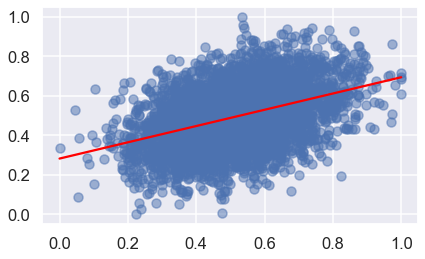

In [16]:
import numpy as np
import matplotlib.pyplot as plt
# plot x = "population" and y = price

x = X_scaled_values[:, 4]
y = Y_scaled_values

coefficients = np.polyfit(x, y, 1)
poly = np.poly1d(coefficients.flatten())

x_regression = np.linspace(min(x), max(x), 100)
y_regression = poly(x_regression)

plt.scatter(x, y, alpha=0.5)
plt.plot(x_regression, y_regression, color='red')

plt.show()

#### Analyze Data

Except the Avg. Bedroom plot, it looks good to use in a linear regression.

# 2. Manual Exploration of Linear Regression Line
In this task we will manually explore the linear regression line for the model x = "Avg. Area House Age" and y = price. This will give us a good intution about the process.
The goal now is to fit a line 
$$
h(\theta) = \theta_0 + \theta_1*x 
$$
to all data points (x,y), such that the L2 error 
$$
 E(\theta) = \sum(h(\theta)-y)^2 $$ is minimized. In this task we will manually change the values of theta0 and theta1 such that we obtain the smallest possible error. 

In [18]:
# define the function h(theta)
def h(theta0, theta1, x):
    """
    Return the model theta0 + theta1*x
    
    """
    return theta0 + theta1*x

 ### 2.1  Define the square loss (L2) function

In [24]:
import numpy as np


def sqerror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model
    Input: x, y vectors
    Returns: average L2 square error
    Assumptions: none
    """
    # x = X_scaled_values
    # y = Y_scaled_values
    model = len(X_scaled_values)
    predicted_values = h(theta0, theta1, x)
    L2_error = np.sum((predicted_values - y) ** 2)
    return L2_error / (2 * model)

## testing

print(sqerror(x[0], y, 0.29,0.52))
print(sqerror(x[1], y, 0.29,0.52))

0.02396758635091445
0.026136959816576186


### 2.2 - Define the L1 Absolute error function

In [25]:
import numpy as np
import math

def abserror(x, y, theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Input: x, y vectors
    Returns: average L1 error
    Assumptions: none
    """
    # x = X_scaled_values
    # y = Y_scaled_values
    model = len(X_scaled_values)
    L1_error = np.sum(np.abs(h(theta0, theta1, x) - y))
    return L1_error / model
    
## testing
print(abserror(x[0], y, 0.29,0.52))
print(abserror(x[1], y, 0.29,0.52))

0.18283405569860095
0.19245039443629533


### 2.3 - Define the Pseudo Huber loss function
Define the function, huberror that computes the pseudo huber error based on the two arguments provided. The function h(theta) is as defined above. Assume that x and y are the observed vectors. The equation for this function is given by 

In [26]:
import numpy as np
import math

## BEGIN ANSWER
def huberror(x, y, theta0, theta1, delta):
    """
    Input: parameters theta0, theta1 and delta of the model 
    Input: x, y vectors
    Returns: psuedo huber error
    Assumptions: none
    """
    # x = X_scaled_values
    # y = Y_scaled_values
    a = np.abs(h(theta0, theta1, x) - y)
    huber_error = np.mean(np.where(a <= delta, 0.5 * a**2, delta * (a - 0.5 * delta)))
    return huber_error
    
## END ANSWER

## testing
print(huberror(x[0], y, 0.29,0.52,0.1))
print(huberror(x[1], y, 0.29,0.52,0.1))

0.01376526818769737
0.014686524591770111


### 2.4 Interactive Exploration.
Let us initialize the interat widget to create sliders that allows us to change the values of theta0 and theta1 and see how things change. Complete the function f below. The function is expected to get two values theta0 and theta1 and plot both the observed points (x,y) and the regression line on the same plot. It also needs to compute the error and display and error.

In [27]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [28]:
import pylab
import numpy

def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # plot the line for theta0 and theta1
    x = X_scaled_values
    y = h(theta0, theta1, x) 
    # compose plot
    pylab.plot(x,y) 
    
    # compute the L2 error or sqerr for theta0 and theta1 for 5 decimal places
    sqerr = sqerror(x, Y_scaled_values, theta0, theta1)
    # compute the absolute or L1 error or abserr for theta0 and theta1
    abserr = abserror(x, Y_scaled_values, theta0, theta1)
    # compute the huber error for theta0 and theta1
    huber = huberror(x, Y_scaled_values, theta0, theta1, delta=1.0)
                    
    pylab.title('L1=' + str(abserr) + '  L2=' + str(sqerr) + '  hub=' + str(huber))
    
    # plot the points
    x1 = X_scaled_values[:,1]
    y1 = Y_scaled_values
    pylab.scatter(x1, y1, alpha=0.5)
    pylab.show() # show the plot  

interact(f, theta1=(0,1,0.1), theta0=(0,1,0.1));


interactive(children=(FloatSlider(value=0.0, description='theta0', max=1.0), FloatSlider(value=0.0, descriptio…

### 2.5 Record the best/smallest values for each error function

In [29]:
# BEST VALUES FOR AVE SQUARE ERROR
theta0 = 0.4
theta1 = 0.2
error = 0.54
# BEST VALUES FOR AVE ABS ERROR
theta0 = 0.4
theta1 = 0.2
error = 0.047

# BEST VALUES FOR AVE HUBER ERROR
theta0 = 0.4
theta1 = 0.2
error = 0.0094

# 3 - Gradient Descent - Univariate
In this task I use the Gradient descent methods to find a "better" values for theta0 and theta1 that minimizes the error. Gradient descent is an iterative algorithm. It computes values of theta0 and theta1 in the direction of reaching the minimum point in the error function. The iterative formulas using L2 loss function for theta0 and theta1 are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x^j + \theta_0)-y^j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x^j + \theta_0 - y^j)*x^j
$$

The alpha is called the "learning rate". $(x^j, y^j)$ is the j-th observation. It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works. When implementing you need to simulataneously compute the values of theta0 and theta1. (do not use a changed theta0 value in computing theta1 in the same iteration.)

### 3.1 Compute Parameters using the Gradient Descent algorithm (L2 loss)

print out the theta0 and theta1 values for each iteration. compare with the sample output depends on manual theta0 and theta1 values by plot.

In [30]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0 and theta1 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.

# BEGIN ANSWER  
def gd2(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    theta0 = 0.0
    theta1 = 0.0
    oldError = 0.0
    error = np.mean((theta1 * obsX + theta0 - obsY)**2)
    
    iterations = 0
    

    while abs(error - oldError) > threshold:
        oldError = error
        theta0 = theta0 - alpha * np.mean(theta1 * obsX + theta0 - obsY)
        theta1 = theta1 - alpha * np.mean((theta1 * obsX + theta0 - obsY) * obsX)
        
        error = np.mean((theta1 * obsX + theta0 - obsY)**2)
        
        # print(f"theta0 = {theta0}, theta1 = {theta1}, error = {error}")
        
        iterations += 1
    
    return theta0, theta1, error, iterations
    
    

[theta0,theta1,newError,iterations] = gd2(x[1],y,0.01,0.0001)
print(iterations)

195


In [31]:
# observe theta0 and theta1
theta0, theta1

(0.42516579253398107, 0.023384118589368955)

### 3.2 Compute Gradient Descent (Huber)

First Compute a formula for Pseudo huber gradient descent using derivative methods. Similar to L2 descent, use the new formulas (obtained from pseudo huber derivatives) to compute values of theta1, theta1, error. The pseudo huber loss function is provided in 2.3. Use that to differentiate the huber function wrt to theta0 and theta1. 

In [32]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error, 
# the function returns theta0, theta1, error and iterations
# that reaches a minimum error threshold
def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1 from Gradient Descent huber loss algorithm
    Return: Iterations and huber Error
    """
    theta0 = 0.0
    theta1 = 0.0

    oldError = np.inf
    error = np.mean(np.where(np.abs(theta1 * obsX + theta0 - obsY) < delta, 0.5 * (theta1 * obsX + theta0 - obsY)**2, delta * (np.abs(theta1 * obsX + theta0 - obsY) - 0.5 * delta)))
    

    iterations = 0
    while abs(error - oldError) > threshold:
        oldError = error
        gradient_theta0 = np.mean(np.where(np.abs(theta1 * obsX + theta0 - obsY) < delta, theta1 * obsX + theta0 - obsY, delta * np.sign(theta1 * obsX + theta0 - obsY)))
        gradient_theta1 = np.mean(np.where(np.abs(theta1 * obsX + theta0 - obsY) < delta, obsX * (theta1 * obsX + theta0 - obsY), delta * obsX * np.sign(theta1 * obsX + theta0 - obsY)))
        

        theta0 = theta0 - alpha * gradient_theta0
        theta1 = theta1 - alpha * gradient_theta1
        

        error = np.mean(np.where(np.abs(theta1 * obsX + theta0 - obsY) < delta, 0.5 * (theta1 * obsX + theta0 - obsY)**2, delta * (np.abs(theta1 * obsX + theta0 - obsY) - 0.5 * delta)))
        
        # print(f"theta0 = {theta0}, theta1 = {theta1}, error = {error}")
        
        iterations += 1
    
    return theta0, theta1, error, iterations


# testing    
[theta0,theta1,newError,iterations] = gdh(x[1],y,0.01,0.000001,0.01)
print(iterations)

473


In [33]:
print(f"theta0 = {theta0}, theta1 = {theta1}, error = {error}")

theta0 = 0.04725370648888049, theta1 = 0.0026252059160489154, error = 0.0094


$$
\theta_0 = 0.04725370648888049
$$
$$
\theta_1 = 0.0026252059160489154
$$
$$
\alpha = 0.01
$$
$$
error = 0.0094
$$
$$
\text{2. This method find better value of theta1 and 2 than what I assume in the plot.}
$$

### 3.3 Compare with sk-learn Estimators

In [35]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x_reshaped = x.reshape(-1,1)
result = lm.fit(x_reshaped,y)      
print(result.intercept_)
print(result.coef_)

[0.45570804]
[[0.09144331]]


In [36]:
theta0 = result.intercept_
theta1 = result.coef_
sqerror(x[1], y, theta0,theta1)

0.011085217661268448

# Task 4 - Extending the Model to a Bivariate
In this task I will extend the model to predict housing price using two features "$x_1 = $Avg. Area House Age" and "$x_2 = $Avg. Area Number of Rooms". The regression model is then defined by  
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$

### 4.1
We need to estimate the values of $\theta_2, \theta_1, \theta_0$. 
The $\theta_0$ formula is given below (using L2 norm). Using the same formating write the formulas for $\theta_1$ and $\theta_2$. The alpha is called the "learning rate". It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or be at the risk of over shooting the minimum point (large alpha). You may have to experiemnt with few alphas to find something that works.

$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_2*x_2^j + \theta_1*x_1^j + \theta_0)-y^j)
$$
$$
\theta_1=\theta_1-\alpha  *(\sum (\theta _2*x_2^j)+(\theta _1*x_j1^j)+\theta _0)-y^j)*x_1^j 
$$
$$
\theta_2=\theta_2-\alpha  *(\sum (\theta_2*x_2^j)+(\theta _1*x_j1)^j+\theta _0)-y^j)*x_2^j
$$


### 4.2 Compute Parameters using the Gradient Descent Algorithm (L2 loss)
Print out the $\theta_0$, $\theta_1$ and $\theta_2$ values for each iteration

In [37]:
# given the observed data (obsX,obsY), learning rate (alpha), and desired error threshold, 
# the function returns theta0, theta1 and theta2 when it reaches the error threshold.
# The convergence is reached when the abs(newError - oldError) is less than the threshold.
def gd22(obsX, obsY, alpha, threshold):
    """
    Input : observed vectors X, Y, alpha and threshold
    Return theta0, theta1, theta2 from Gradient Descent L2 loss algorithm
    Return: Iterations and L2 Error
    """
    
    # Initialize parameters
    theta0 = 0.0
    theta1 = 0.0
    theta2 = 0.0
    oldError = 0.0
    
    # Calculate initial error
    error = np.mean((theta2 * obsX[1] + theta1 * obsX[0] + theta0 - obsY) ** 2)
    
    iterations = 0

    while abs(error - oldError) > threshold:
        oldError = error
        
        # Update parameters using the L2 loss gradient descent rule
        gradient_theta0 = np.mean(theta2 * obsX[1] + theta1 * obsX[0] + theta0 - obsY)
        gradient_theta1 = np.mean((theta2 * obsX[1] + theta1 * obsX[0] + theta0 - obsY) * obsX[0])
        gradient_theta2 = np.mean((theta2 * obsX[1] + theta1 * obsX[0] + theta0 - obsY) * obsX[1])

        theta0 = theta0 - alpha * gradient_theta0
        theta1 = theta1 - alpha * gradient_theta1
        theta2 = theta2 - alpha * gradient_theta2

        # Compute the new error
        error = np.mean((theta2 * obsX[1] + theta1 * obsX[0] + theta0 - obsY) ** 2)

        # Print out the values for each iteration
        # print(f"Theta0 = {theta0}, Theta1 = {theta1}, Theta2 = {theta2}, Error = {error}")

        iterations += 1

    return theta0, theta1, theta2, error, iterations

[theta0,theta1,theta2, newError,iterations] = gd22(x[[1,2]],y,0.01,0.0001)
print(iterations)

187


In [39]:
print(f"Theta0 = {theta0}, Theta1 = {theta1}, Theta2 = {theta2}, Error = {error}")

Theta0 = 0.40471164923769476, Theta1 = 0.02248398051320527, Theta2 = 0.09443271815546204, Error = 0.0094


Write the values of thetas obtained from function above.
$$\theta_0 =0.40471164923769476$$ 
$$\theta_1 =0.02248398051320527$$ 
$$\theta_2 =0.09443271815546204$$ 
and write the model 
$$
y = \theta_2*x_2 + \theta_1*x_1 + \theta_0
$$

### 4.3 Compare Coefficients with Library Estimators
Now use the sklearn LinearRegression module to automate the process of finding coefficients. 

In [42]:
# fit a regression model
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# assume
# Normalize value to make easy to compare with what I got
scaler = MinMaxScaler()
y = scaler.fit_transform(df_training.Price.to_frame())
X = scaler.fit_transform(df_training[["Avg. Area House Age","Avg. Area Number of Rooms"]])

model = LinearRegression().fit(X, y)
model
print(model.coef_)
print(model.intercept_)

[[0.45718158 0.36702939]]
[0.09096981]


### Compare my manual model and sk-learn model

coefficients is can assume it is in the error range(0.45, 0.36 | 0.40, 0.02)

Error(0.09) is as same as squared error What I calculated(0.09).

### 4.4.1 - Predict the Housing Price using test set data - gradient descent
Use the test set to find the estimated value of the home $y$ using coefficients received from gradient descent. Defined the average error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [43]:
theta0 = 0.40471164923769476
theta1 = 0.40471164923769476
theta2 = 0.09443271815546204

testY = scaler.fit_transform(df_testing.Price.to_frame())
testX = scaler.fit_transform(df_testing[["Avg. Area House Age","Avg. Area Number of Rooms"]])
predicted_prices = theta0 + theta1 * testX[:, 0] + theta2 * testX[:, 1]
errors = np.abs(predicted_prices - testY)
error_gd = np.mean(errors)


error_gd

0.19717599530633184

### 4.4.2 - Predict the Housing Price using test set data - sk-learn estimator
Use the test set to find the estimated value of the home $y$ using coefficients received from sk-lrean estimators. Defined the averge error as 1/m * $\sum$ abs(predicted - actual) where m is the size of the test data set.

In [46]:
testX = scaler.fit_transform(df_testing[["Avg. Area House Age", "Avg. Area Number of Rooms"]])
testY = scaler.fit_transform(df_testing["Price"].to_frame())
predicted_prices_library = model.predict(testX)
errors_library = np.abs(predicted_prices_library - testY)
error_lib = np.mean(errors_library)

error_lib 

0.12166769680633198

## 5. Result of this project

sklearn predict is better than what I done with manually, but it is in the error range and showing not really big different. +-0.07 range. And this ratio is can use to predict the price and make a reasonable result. Check the report